In [5]:
# Import the necessary  libraries for analysis

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

# read in the data

df=pd.read_csv(r'C:\Users\user\Downloads\dailyActivity_merged.csv')


In [11]:
#looking in to data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [122]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [123]:
# performing Cleaning on the data
# (1) Looking for missing data

for col in df.columns:
    missing = np.mean(df[col].isnull())
    print(col,missing)



Id 0.0
ActivityDate 0.0
TotalSteps 0.0
TotalDistance 0.0
TrackerDistance 0.0
LoggedActivitiesDistance 0.0
VeryActiveDistance 0.0
ModeratelyActiveDistance 0.0
LightActiveDistance 0.0
SedentaryActiveDistance 0.0
VeryActiveMinutes 0.0
FairlyActiveMinutes 0.0
LightlyActiveMinutes 0.0
SedentaryMinutes 0.0
Calories 0.0


In [124]:
# (2) looking at and making any necessary changes in datadata types
df.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [125]:
# the data type of the ActivityDate column is 'int64', to make it more convinient to work with we will change it to datime format

df['ActivityDate']= pd.to_datetime(df['ActivityDate'])

In [27]:
df.dtypes

Id                                   int64
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

In [126]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [33]:
pd.set_option('display.max_rows', None)

In [127]:
# looking at the unique number of users and the number of days we have in the data set

df.nunique()



Id                           33
ActivityDate                 31
TotalSteps                  842
TotalDistance               615
TrackerDistance             613
LoggedActivitiesDistance     19
VeryActiveDistance          333
ModeratelyActiveDistance    211
LightActiveDistance         491
SedentaryActiveDistance       9
VeryActiveMinutes           122
FairlyActiveMinutes          81
LightlyActiveMinutes        335
SedentaryMinutes            549
Calories                    734
dtype: int64

In [128]:
# looking at correlations



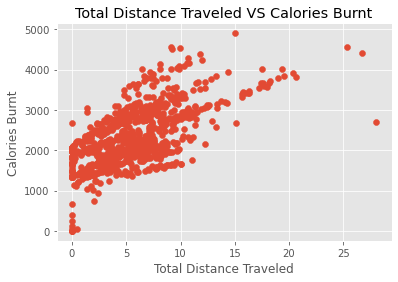

In [129]:
# to see the Corrlation between total distance traveled and burnt calories we are going to create a scatter plot

plt.scatter(x=df['TotalDistance'], y=df['Calories'])

plt.title('Total Distance Traveled VS Calories Burnt')

plt.xlabel('Total Distance Traveled')

plt.ylabel('Calories Burnt')

plt.show()





<AxesSubplot:xlabel='TotalDistance', ylabel='Calories'>

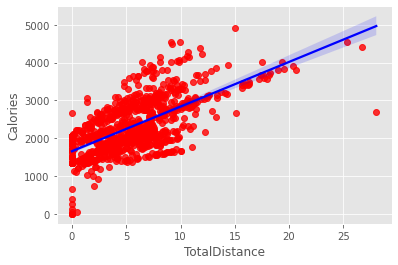

In [130]:
# to make the plot more readable we will inser a trent line using seaborn's regplot


sns.regplot(x='TotalDistance', y='Calories', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'} )

In [54]:
# looking at the correlations between the different dimensions of the data

df.corr()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
Id,1.000000,0.185721,0.241000,0.238816,0.188015,0.308691,0.026665,0.019629,-0.015698,0.303608,0.051158,-0.098754,-0.043319,0.396671
TotalSteps,0.185721,1.000000,0.985369,0.984822,0.181849,0.740115,0.507105,0.692208,0.070505,0.667079,0.498693,0.569600,-0.327484,0.591568
TotalDistance,0.241000,0.985369,1.000000,0.999505,0.188332,0.794582,0.470758,0.662002,0.082389,0.681297,0.462899,0.516300,-0.288094,0.644962
TrackerDistance,0.238816,0.984822,0.999505,1.000000,0.162585,0.794338,0.470277,0.661365,0.074591,0.680816,0.463154,0.514713,-0.289343,0.645313
LoggedActivitiesDistance,0.188015,0.181849,0.188332,0.162585,1.000000,0.150852,0.076527,0.138302,0.154996,0.234443,0.053860,0.102135,-0.046999,0.207595
VeryActiveDistance,0.308691,0.740115,0.794582,0.794338,0.150852,1.000000,0.192986,0.157669,0.046117,0.826681,0.211730,0.059845,-0.061754,0.491959
ModeratelyActiveDistance,0.026665,0.507105,0.470758,0.470277,0.076527,0.192986,1.000000,0.237847,0.005793,0.225464,0.946934,0.162092,-0.221436,0.216790
LightActiveDistance,0.019629,0.692208,0.662002,0.661365,0.138302,0.157669,0.237847,1.000000,0.099503,0.154966,0.220129,0.885697,-0.413552,0.466917
SedentaryActiveDistance,-0.015698,0.070505,0.082389,0.074591,0.154996,0.046117,0.005793,0.099503,1.000000,0.008258,-0.022361,0.124185,0.035475,0.043652
VeryActiveMinutes,0.303608,0.667079,0.681297,0.680816,0.234443,0.826681,0.225464,0.154966,0.008258,1.000000,0.312420,0.051926,-0.164671,0.615838


In [ ]:
# The matrix shows that there are an number of positive correlatios. the most noticeable one the very active minutes on their days.

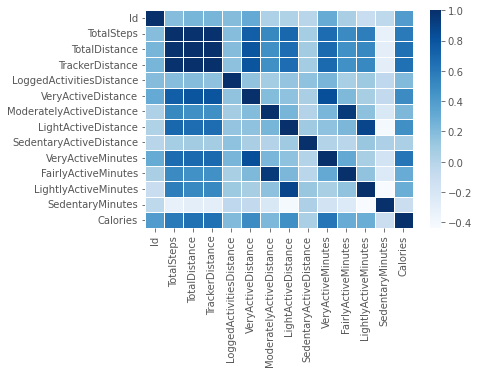

In [137]:
# creating a heat graph for the above matrix to get a better understanding of the correlations
correlations= df.corr()
sns.heatmap(correlations,cmap='Blues', linewidths=.5)
plt.show()

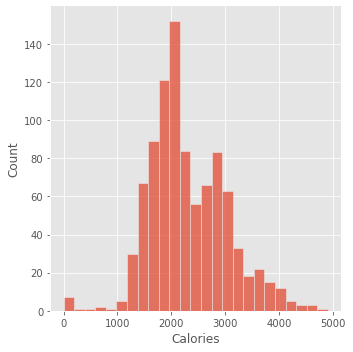

In [150]:
# Looking at the disturibution of total burnt caloris by the users
sns.displot(df['Calories'])

In [151]:
# Another point of view from which i think is wise to see this data is...
# the total amount of time the users data was collected by the device whether they where at an active or sedentary state .
# to do that we are going to drop all the columns from the data frame execept the ones which we can aggregate 
#and get the total tracked time from


In [6]:
# Droping the uneccessary columns

tracked = df.drop(['Id','ActivityDate','TotalDistance','TrackerDistance','LoggedActivitiesDistance','VeryActiveDistance','ModeratelyActiveDistance','LightActiveDistance','SedentaryActiveDistance', 'TotalSteps','Calories'], axis=1)
                  

In [7]:
tracked.head()

,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
0,25,13,328,728
1,21,19,217,776
2,30,11,181,1218
3,29,34,209,726
4,36,10,221,773


In [4]:
for col in tracked.columns:
    total_time = np.mean(tracked[col])
    print(col,total_time)

NameError: name 'tracked' is not defined

In [ ]:
## average tracked time by the device on a day is about 1219 minutes, menaing the device collects the data of 
#users for almost 20 hours a day 

In [133]:
# Exploring the correlations between users sleep data and calories burnt
# I have already merged and cleaned the sleep day and daily activity datasets using SQL
##(click the link for the sql code)

In [135]:
# Reading the merged sleep and calories burnt data
data=pd.read_csv(r'C:\Users\user\Desktop\python portofolio projects\sleepandcaloris.merged.csv')

In [136]:
data.head()

,Id,ActivityDate,TotalMinutesAsleep,TimeToFallAsleep,Calories
0,6117666160,4/21/16 0:00,508,42,4900
1,5577150313,4/17/16 0:00,549,34,4552
2,5577150313,5/1/16 0:00,379,19,4546
3,5577150313,4/30/16 0:00,412,21,4501
4,5577150313,4/24/16 0:00,543,72,4392


In [138]:
#looking at the data types of the columns
data.dtypes


Id                     int64
ActivityDate          object
TotalMinutesAsleep     int64
TimeToFallAsleep       int64
Calories               int64
dtype: object

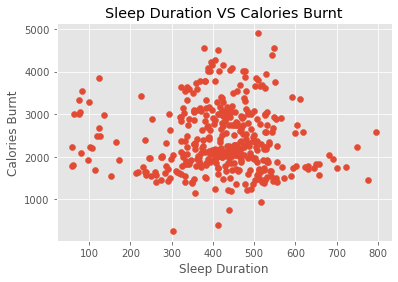

In [140]:
# looking at the corrlation between the sleep durations and time it takes a user to fall asleep VS Calories.


plt.scatter(x=data['TotalMinutesAsleep'], y=data['Calories'])

plt.title('Sleep Duration VS Calories Burnt')

plt.xlabel('Sleep Duration')

plt.ylabel('Calories Burnt')

plt.show()


In [141]:
data.corr()

,Id,TotalMinutesAsleep,TimeToFallAsleep,Calories
Id,1.000000,0.080840,-0.193291,0.404411
TotalMinutesAsleep,0.080840,1.000000,0.000190,-0.031103
TimeToFallAsleep,-0.193291,0.000190,1.000000,-0.289293
Calories,0.404411,-0.031103,-0.289293,1.000000


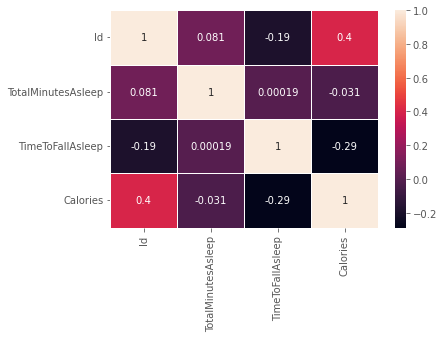

In [143]:
correlations2= data.corr()
sns.heatmap(correlations2, annot=True, linewidths=.5)
plt.show()

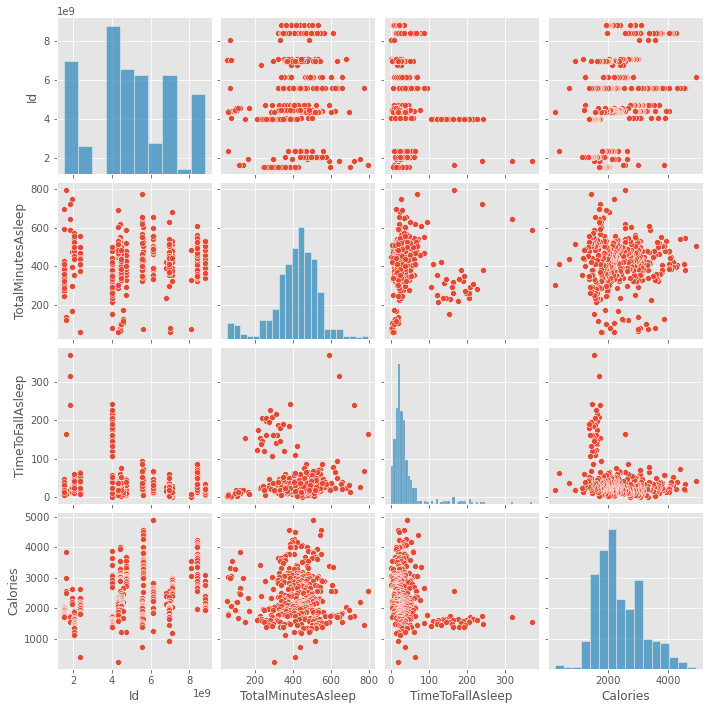

In [144]:
# The above matrix can also be expressed using a pairplot, which is really convinient because it might be easier for some stake holders to read.
sns.pairplot(data)

In [93]:
##There seems to be no significant positive correlation between the calories that the users burnt and their 
##sleep habits or vice versa.